In [20]:
#import necessary libraries
import pandas as pd
import pickle #for dumping the model
import numpy as np #mathematical manipulations
import matplotlib.pyplot as plt #visualization
import seaborn as sns
from sklearn.linear_model import LinearRegression #modeling
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score #test accuracy 


In [21]:
#load and preview data the first five rows
df = pd.read_csv("Ice Cream.csv")
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [22]:
#summarized information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [23]:
#check duplicates 
df.duplicated().sum()

3

In [24]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

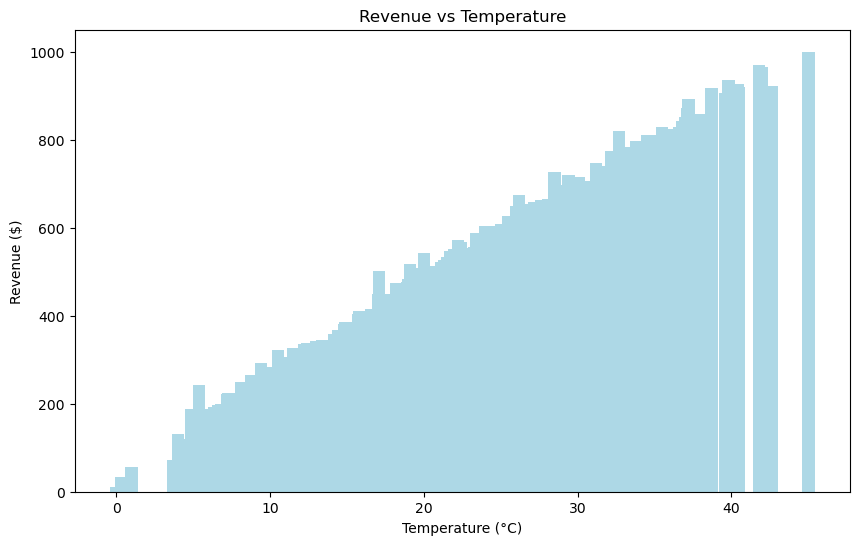

In [25]:
#visualize revenue against temperature
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(df['Temperature'], df['Revenue'], color='lightblue')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs Temperature')

# Display the plot
plt.show()


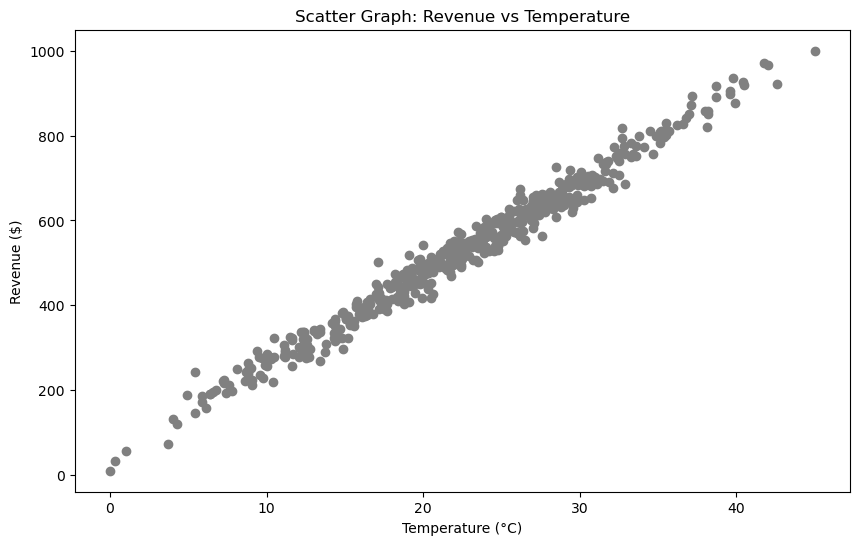

In [26]:
#visualize revenue against temperature
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.scatter(df['Temperature'], df['Revenue'], color='Grey')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue ($)')
plt.title('Scatter Graph: Revenue vs Temperature')

# Display the plot
plt.show()

Both graphs shows revenues increases with temperature suggesting it is wise to sell ice creamduring hot days 

In [27]:
#Split data for modelling
X = df["Temperature"]
y = df["Revenue"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=42)

In [28]:
#sizes of splitted dat
len(X_train),len(y_train), len(X_test),len(y_test)

(347, 347, 150, 150)

In [29]:
# check for dimensions of data split
print("dimension of X_train:",X_train.ndim,"\n dimension of y_train",y_train.ndim)

dimension of X_train: 1 
 dimension of y_train 1


Dimension of train data should be in 2 dimensions not one dimension always. Therefore change dimensions of X_train

In [30]:
#change dimension of train data
X_train = np.array([X_train])
print(X_train.ndim)

#reshape train data
X_train = X_train.reshape(-1,1)

2


In [31]:
#instantiate model and fit train data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
#make predictions 
X_test = np.array([X_test]).reshape(-1,1)
y_predict = model.predict(X_test)

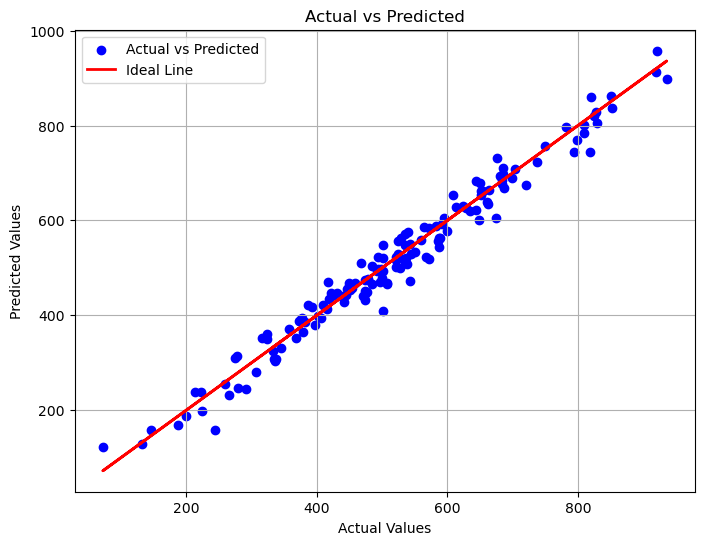

In [33]:
#Visualize y_predict and Actual y

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Ideal Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [34]:
#Evaluate model R^2 score
r2 = r2_score(y_test, y_predict)

print("R^2 Score:", r2)

R^2 Score: 0.9730939720953575


Model is about 97.99% accurate

In [35]:
# make random predictions 
list_temperatures = [4,25,45,55]
list_revenues = []

for i in range(len(list_temperatures)):
    revenue = model.predict([[i]])
    list_revenues.append(revenue[0])
print("Revenues for the respective temperature is given by:'\n", list_revenues)



Revenues for the respective temperature is given by:'
 [41.63989232889571, 63.14680854166068, 84.65372475442565, 106.16064096719063]


In [36]:
##Dump model or model exportation or serialization
with open("model.pkl","wb") as files:
    pickle.dump(model,files)
